# <font color=#3A86FF>Données nutritionnelles - Nettoyage </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [Etude du jeu de donnees](#Etude-du-jeu-de-donnees)
* [Valeurs manquantes](#Valeurs-manquantes)
    * [Pourcentage valeurs manquantes](#Pourcentage-valeurs-manquantes)
    * [Histogramme taux valeurs manquantes](#Histogramme-taux-valeurs-manquantes)
    * [Donnees avec moins de 80% de NA](#Donnees-avec-moins-de-80%-de-valeurs-manquantes)
* [Filtrage des variables qualitatives ayant peu de valeurs uniques
](#Filtrage-des-variables-qualitatives-ayant-peu-de-valeurs-uniques
)
* [Variables quantitatives](#Variables-quantitatives)
* [Variables qualitatives](#Variables-qualitatives)
    * [Diagramme à barres](#Diagramme-a-barres)
* [Ecriture fichier CSV](#Ecriture-fichier-CSV)
* [RAF : Questions a developper](#Reste-a-faire)

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("../Dataset/fr.openfoodfacts.org.products.csv", encoding="utf-8",sep="\t", low_memory=False)

## <font color=#FB5607>Etude du jeu de donnees</font>

Obtenons un aperçu sur un échantillon (8 lignes) de données :

In [2]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
312199,8480024749161,http://world-fr.openfoodfacts.org/produit/8480...,javichu,1398783964,2014-04-29T15:06:04Z,1442537846,2015-09-18T00:57:26Z,Orégano seco molido,Orégano seco molido,10 g,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,-2.0,NaN,NaN
201597,3222475955990,http://world-fr.openfoodfacts.org/produit/3222...,kiliweb,1490983247,2017-03-31T18:00:47Z,1490983247,2017-03-31T18:00:47Z,Camenbert,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN
197626,3176572170063,http://world-fr.openfoodfacts.org/produit/3176...,openfoodfacts-contributors,1366890077,2013-04-25T11:41:17Z,1484423075,2017-01-14T19:44:35Z,Yaourt à la vanille,NaN,140 g,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
294224,7613269490685,http://world-fr.openfoodfacts.org/produit/7613...,openfood-ch-import,1486508197,2017-02-07T22:56:37Z,1487257221,2017-02-16T15:00:21Z,La Pizza al prosciutto cotto e mascarpone,NaN,510 g,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN
120068,0634660403637,http://world-fr.openfoodfacts.org/produit/0634...,usda-ndb-import,1489079770,2017-03-09T17:16:10Z,1489079770,2017-03-09T17:16:10Z,Mild Cheddar Cheese,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21.0,NaN,NaN
273097,5051379036058,http://world-fr.openfoodfacts.org/produit/5051...,usda-ndb-import,1489050348,2017-03-09T09:05:48Z,1489050348,2017-03-09T09:05:48Z,Mushroom Garlic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
45312,0041331024532,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489139628,2017-03-10T09:53:48Z,1489139628,2017-03-10T09:53:48Z,Premium Dark Kidney Beans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-5.0,NaN,NaN
288146,7610695002543,http://world-fr.openfoodfacts.org/produit/7610...,openfood-ch-import,1486498570,2017-02-07T20:16:10Z,1487256208,2017-02-16T14:43:28Z,Tortellini aux bolets,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150959,0814305011452,http://world-fr.openfoodfacts.org/produit/0814...,usda-ndb-import,1489137625,2017-03-10T09:20:25Z,1489137625,2017-03-10T09:20:25Z,Slider Buns,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
246645,3596710399789,http://world-fr.openfoodfacts.org/produit/3596...,openfoodfacts-contributors,1393503412,2014-02-27T12:16:52Z,1441817513,2015-09-09T16:51:53Z,Carottes râpées,Carottes râpées assaisonnées,180 g,...,NaN,76.7,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN


Quelle taille fait le jeu de données?

In [3]:
print(f"{df.shape} (lignes,col) - taille: {df.size} (nb elements)")

(320772, 162) (lignes,col) - taille: 51965064 (nb elements)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


*Voyons quelles sont les 162 colonnes et leur type?*

In [5]:
pd.set_option('display.max_rows', 162)
df.dtypes.head(10)

code                      object
url                       object
creator                   object
created_t                 object
created_datetime          object
last_modified_t           object
last_modified_datetime    object
product_name              object
generic_name              object
quantity                  object
dtype: object

## <font color=#FB5607>Valeurs manquantes</font>

*A présent, voyons combien de valeurs manquantes il y a par variable*

In [6]:
# df.isna().sum() est de type Series
sCountNA=df.isna().sum()
sCountNA.head(10)

code                          23
url                           23
creator                        2
created_t                      3
created_datetime               9
last_modified_t                0
last_modified_datetime         0
product_name               17762
generic_name              267977
quantity                  215953
dtype: int64

Pour determiner les variables qui ont "trop" de valeurs manquantes, calculons le taux de ces valeurs

### <font color=#FB5607>Pourcentage valeurs manquantes</font>

In [7]:
import numpy as np
# nombre de ligne par variables : 320772
rowCount=len(df['water-hardness_100g']) 

# pourcentage de valeurs non vides par variable + tri par ordre decroissant
pctNA=(sCountNA/rowCount*100).sort_values(ascending=False)
pctNA=pctNA.astype('int') # conversion int

Nous avons calculé le pourcentage de valeurs manquantes mais aussi trié par taux décroissant\
pour identifier toutes les variables avec plus de 80% de valeurs manquantes

In [8]:
pctNA.head(10)

water-hardness_100g                      100
no_nutriments                            100
ingredients_that_may_be_from_palm_oil    100
nutrition_grade_uk                       100
nervonic-acid_100g                       100
erucic-acid_100g                         100
mead-acid_100g                           100
elaidic-acid_100g                        100
butyric-acid_100g                        100
caproic-acid_100g                        100
dtype: int64

Determinons la position de la variable qui correspond au seuil de 81%.\
Cette position permet de séparer les variable qui ont plus (ou moins) de 80% de valeurs manquantes.

In [9]:
# index de la limite à 80% de valeurs manquantes (NA)
limitCountNA=pctNA.index.get_loc(pctNA[pctNA==81].index.values[0])
limitCountNA

107

### <font color=#FB5607>Histogramme taux valeurs manquantes</font>

On estime qu'au dessus d'un seuil de 80% de valeurs manquantes, le jeu de données n'est plus représentatif.

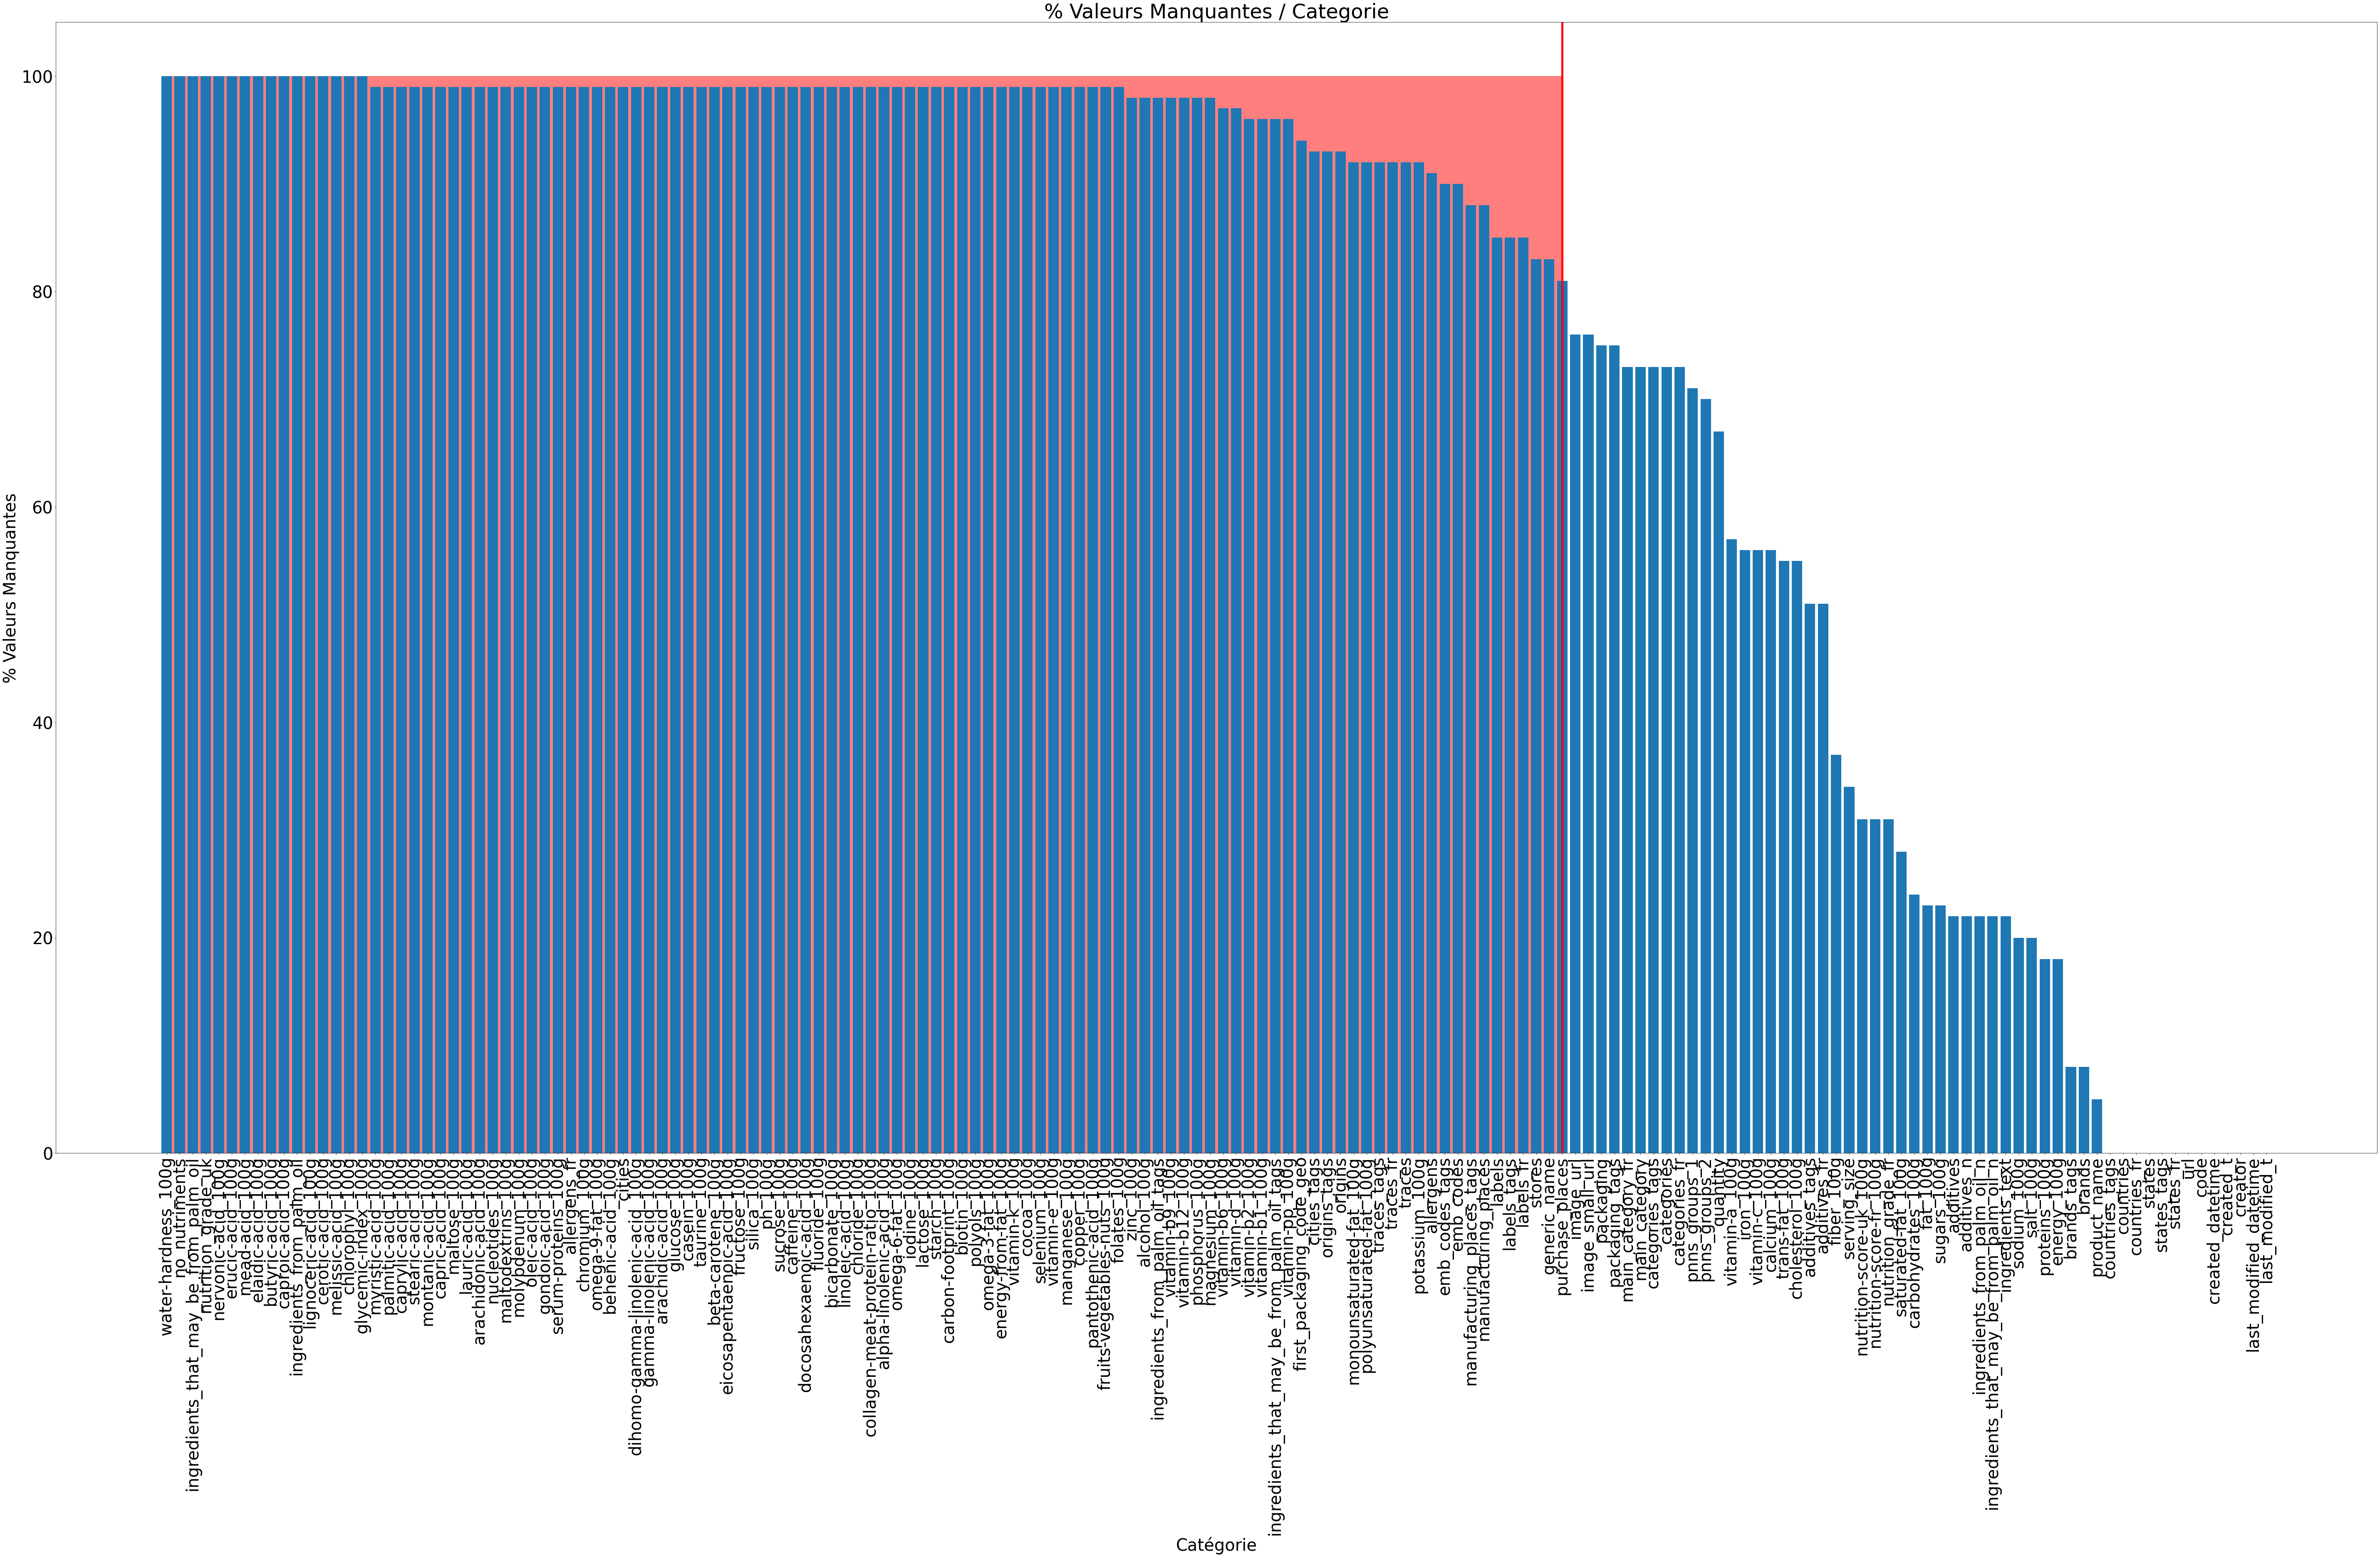

In [10]:
from matplotlib import pyplot as plt
# taille du graphique
plt.rcParams['font.size'] = '40.0'
plt.rcParams["figure.figsize"] = (100,50)
# bar chart
plt.bar(pctNA.index,pctNA)
# ligne limite des 80% de valeurs manquantes
plt.axvline(limitCountNA, color='r',lw=5)
plt.fill_betweenx(pctNA,limitCountNA,color="red",alpha=.5)

# rotation à la verticale des libelles
plt.xticks(rotation=90)

# Titre et libelles
plt.title('% Valeurs Manquantes / Categorie')
plt.xlabel('Catégorie')
plt.ylabel('% Valeurs Manquantes')

plt.show()

# reset defaults
plt.rcdefaults()

Les données dans la zone rouge (à  gauche) sont toutes les données dont le taux de valeurs manquantes est supérieur à 80%.\
Ces données sont donc écartées de notre étude.

### <font color=#FB5607>Donnees avec moins de 80% de valeurs manquantes</font>

On ne garde donc que les colonnes ayant moins de 80% de valeurs manquantes

In [11]:
# identification des colonnes avec taux de valeurs manquantes < 81%
colonnesNA80=pctNA[pctNA<81]
colonnesNA80.index

Index(['image_url', 'image_small_url', 'packaging', 'packaging_tags',
       'main_category_fr', 'main_category', 'categories_tags', 'categories',
       'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'quantity',
       'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g', 'calcium_100g',
       'trans-fat_100g', 'cholesterol_100g', 'additives_tags', 'additives_fr',
       'fiber_100g', 'serving_size', 'nutrition-score-uk_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr', 'saturated-fat_100g',
       'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'additives',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g',
       'brands_tags', 'brands', 'product_name', 'countries_tags', 'countries',
       'countries_fr', 'states', 'states_tags', 'states_fr', 'url', 'code',
       'created_datetime', 'created_t', 'creator', 'last_modified_datetime',

In [12]:
# filtrage
dfNA80=df[colonnesNA80.index]
dfNA80.head()

,image_url,image_small_url,packaging,packaging_tags,main_category_fr,main_category,categories_tags,categories,categories_fr,pnns_groups_1,...,states,states_tags,states_fr,url,code,created_datetime,created_t,creator,last_modified_datetime,last_modified_t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",http://world-fr.openfoodfacts.org/produit/0000...,0000000003087,2016-09-17T09:17:46Z,1474103866,openfoodfacts-contributors,2016-09-17T09:18:13Z,1474103893
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000004530,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,2017-03-09T14:32:37Z,1489069957
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000004559,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,2017-03-09T14:32:37Z,1489069957
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000016087,2017-03-09T10:35:31Z,1489055731,usda-ndb-import,2017-03-09T10:35:31Z,1489055731
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000016094,2017-03-09T10:34:13Z,1489055653,usda-ndb-import,2017-03-09T10:34:13Z,1489055653


## <font color=#FB5607>Filtrage des variables qualitatives ayant peu de valeurs uniques</font>

In [13]:
# identification des colonnes numériques et qualitatives
colonnesNum=dfNA80.select_dtypes(np.number).columns.tolist()
colonnesQual=dfNA80.select_dtypes('O').columns.tolist()

In [14]:
# filtrage des données qualitative + tri des colonnes par nombre de valeurs uniques
dfNA80ObjSortes=(dfNA80.describe(include='O')).sort_values(by='unique',axis=1,ascending=True)

# identification des colonnes qualitatives comportant peu de valeurs uniques (beaucoup de doublons)
dfNA80ObjUniq=dfNA80ObjSortes.loc[dfNA80ObjSortes.index=='unique']
dfNA80ObjUniq

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,countries_fr,countries_tags,states_fr,states,states_tags,countries,creator,...,image_url,last_modified_t,last_modified_datetime,created_t,created_datetime,additives,ingredients_text,product_name,url,code
unique,5,14,42,722,725,1021,1021,1021,1434,3535,...,75836,180495,180495,189567,189568,196069,205520,221347,320749,320749


*On exclue les données qualitatives avec très peu de valeurs uniques (nutrition_grade_fr,pnns_groups_1,pnns_groups_2)*

In [15]:
# colonnes qualitatives sans les colonnes contenant beaucoup de doublons
colonnesQual=list(set(colonnesQual)-set(['nutrition_grade_fr', 'pnns_groups_1','pnns_groups_2']))
colonnesQual

['main_category',
 'created_t',
 'packaging',
 'countries',
 'categories_tags',
 'countries_tags',
 'main_category_fr',
 'product_name',
 'packaging_tags',
 'additives',
 'states_fr',
 'serving_size',
 'image_small_url',
 'image_url',
 'brands_tags',
 'additives_fr',
 'quantity',
 'additives_tags',
 'countries_fr',
 'categories',
 'categories_fr',
 'states',
 'states_tags',
 'ingredients_text',
 'brands',
 'creator',
 'url',
 'last_modified_datetime',
 'last_modified_t',
 'code',
 'created_datetime']

## <font color=#FB5607>Variables quantitatives</font>

In [16]:
dfNum=dfNA80[colonnesNum]
dfNum.describe()

,vitamin-a_100g,iron_100g,vitamin-c_100g,calcium_100g,trans-fat_100g,cholesterol_100g,fiber_100g,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,sugars_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,sodium_100g,salt_100g,proteins_100g,energy_100g
count,137554.000000,140462.000000,140867.000000,141050.000000,143298.000000,144090.000000,200886.000000,221210.000000,221210.000000,229554.000000,243588.000000,243891.000000,244971.000000,248939.000000,248939.000000,248939.000000,255463.000000,255510.000000,259922.000000,2.611130e+05
mean,0.000397,0.003652,0.023367,0.125163,0.073476,0.020071,2.862111,9.058049,9.165535,5.129932,32.073981,12.730379,16.003484,1.936024,0.019659,0.055246,0.798815,2.028624,7.075940,1.141915e+03
std,0.073278,0.214408,2.236451,3.318263,1.540223,0.358062,12.867578,9.183589,9.055903,8.014238,29.731719,17.578747,22.327284,2.502019,0.140524,0.269207,50.504428,128.269454,8.409054,6.447154e+03
min,-0.000340,-0.000260,-0.002100,0.000000,-3.570000,0.000000,-6.700000,-15.000000,-15.000000,0.000000,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,0.000000,-800.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.025000,0.063500,0.700000,3.770000e+02
50%,0.000000,0.001010,0.000000,0.035000,0.000000,0.000000,1.500000,9.000000,10.000000,1.790000,20.600000,5.000000,5.710000,1.000000,0.000000,0.000000,0.229000,0.581660,4.760000,1.100000e+03
75%,0.000107,0.002400,0.003700,0.106000,0.000000,0.020000,3.600000,16.000000,16.000000,7.140000,58.330000,20.000000,24.000000,3.000000,0.000000,0.000000,0.541000,1.374140,10.000000,1.674000e+03
max,26.700000,50.000000,716.981100,694.737000,369.000000,95.238000,5380.000000,40.000000,40.000000,550.000000,2916.670000,714.290000,3520.000000,31.000000,2.000000,6.000000,25320.000000,64312.800000,430.000000,3.251373e+06


Text(0.5, 1.0, 'Variables Quantitatives')

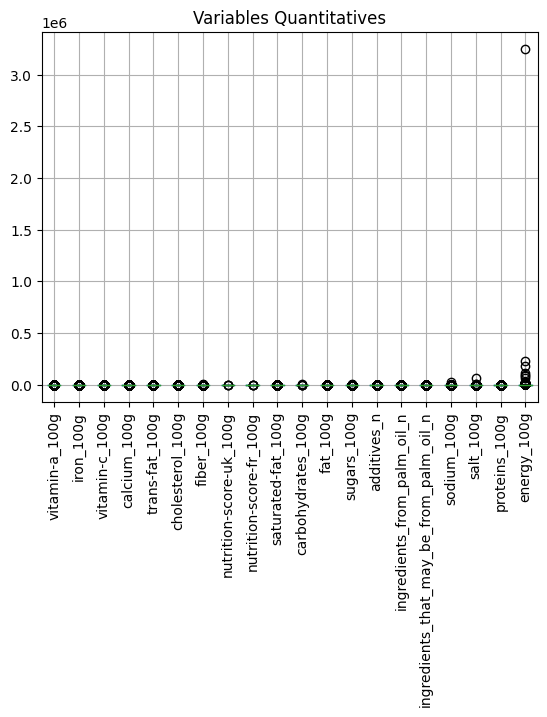

In [17]:
# boite à moustaches sur le variables quantitatives
ax=dfNum.boxplot(rot=90)
ax.set_title("Variables Quantitatives")

On remarque un individu atypique pour la variable "energy_100g"

In [18]:
maxEnergy100g=dfNum['energy_100g'].max()

On écarte cette individu pour voir si le boxplot est plus lisible

In [19]:
dfNumNew=(dfNum[dfNum['energy_100g']<maxEnergy100g])

Text(0.5, 1.0, 'Variables Quantitatives sans atypique')

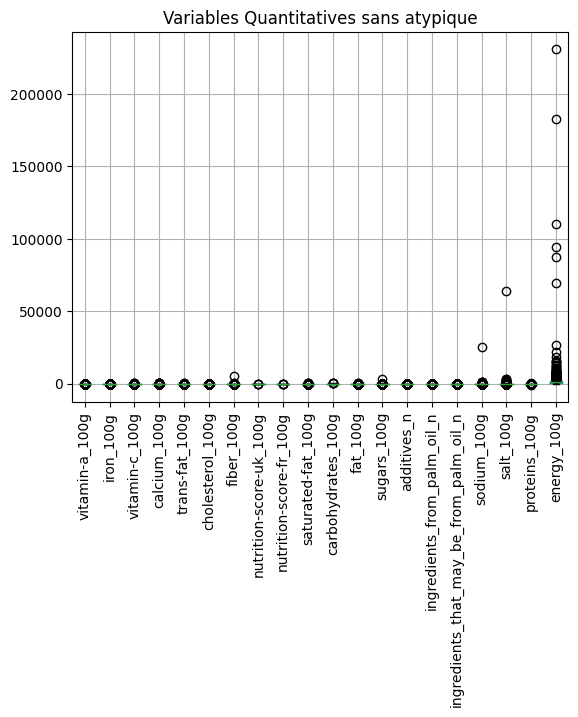

In [20]:
ax=dfNumNew.boxplot(rot=90)
ax.set_title("Variables Quantitatives sans atypique")

## <font color=#FB5607>Variables qualitatives</font>

In [21]:
dfQual=dfNA80[colonnesQual]
dfQual.shape

(320772, 31)

In [22]:
dfQual.describe()

,main_category,created_t,packaging,countries,categories_tags,countries_tags,main_category_fr,product_name,packaging_tags,additives,...,states,states_tags,ingredients_text,brands,creator,url,last_modified_datetime,last_modified_t,code,created_datetime
count,84366,320769,78960,320492,84389,320492,84366,303010,78961,248905,...,320726,320726,248962,292360,320770,320749,320772,320772,320749,320763
unique,3543,189567,14547,1434,21142,725,3543,221347,12064,196069,...,1021,1021,205520,58784,3535,320749,180495,180495,320749,189568
top,en:beverages,1489077120,Carton,US,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:united-states,Boissons,Ice Cream,"sachet,plastique",[ extra-virgin-olive-oil -> en:extra-virgin-o...,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","Carbonated water, natural flavor.",Carrefour,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0079...,2015-08-09T17:35:42Z,1439141742,0011213899862,2017-03-09T16:32:00Z
freq,6054,20,2153,169928,802,172998,6054,410,3959,397,...,168905,168905,222,2978,169868,1,33,33,1,20


On constate que le dataframe dfQual contient des centaines de milliers de valeurs distinctes par variables.\
Pour simplifier le dataframe, nous créeons une function qui calcule la fréquence de valeur de chaque variable d'un dataframe\
Et catégorise dans la variable 'Autre' toutes les occurences en dessous du seuil ('threshold') choisi.

In [23]:
# fonction mode qui agrege les variables qui sont sous un seuil 'threshold'(pour les très gros dataframe qui ont du mal à plotter)
def summarizeFrequenciesDf(df,threshold):
    dfFrequencies=df.value_counts(normalize=True) # frequence normalisée des valeurs de chaque variable
    mask = dfFrequencies>threshold # masque sur les fréquences > seuil
    dfTail= dfFrequencies.loc[~mask].sum()
    dfFrequencies=dfFrequencies.loc[mask] # filtre sur les fréquences < seuil
    dfFrequencies['Autres']=dfTail # ajout des fréquences > seuil agregées dans la categorie 'Autre'
    return pd.DataFrame(dfFrequencies)

### Diagramme a barres

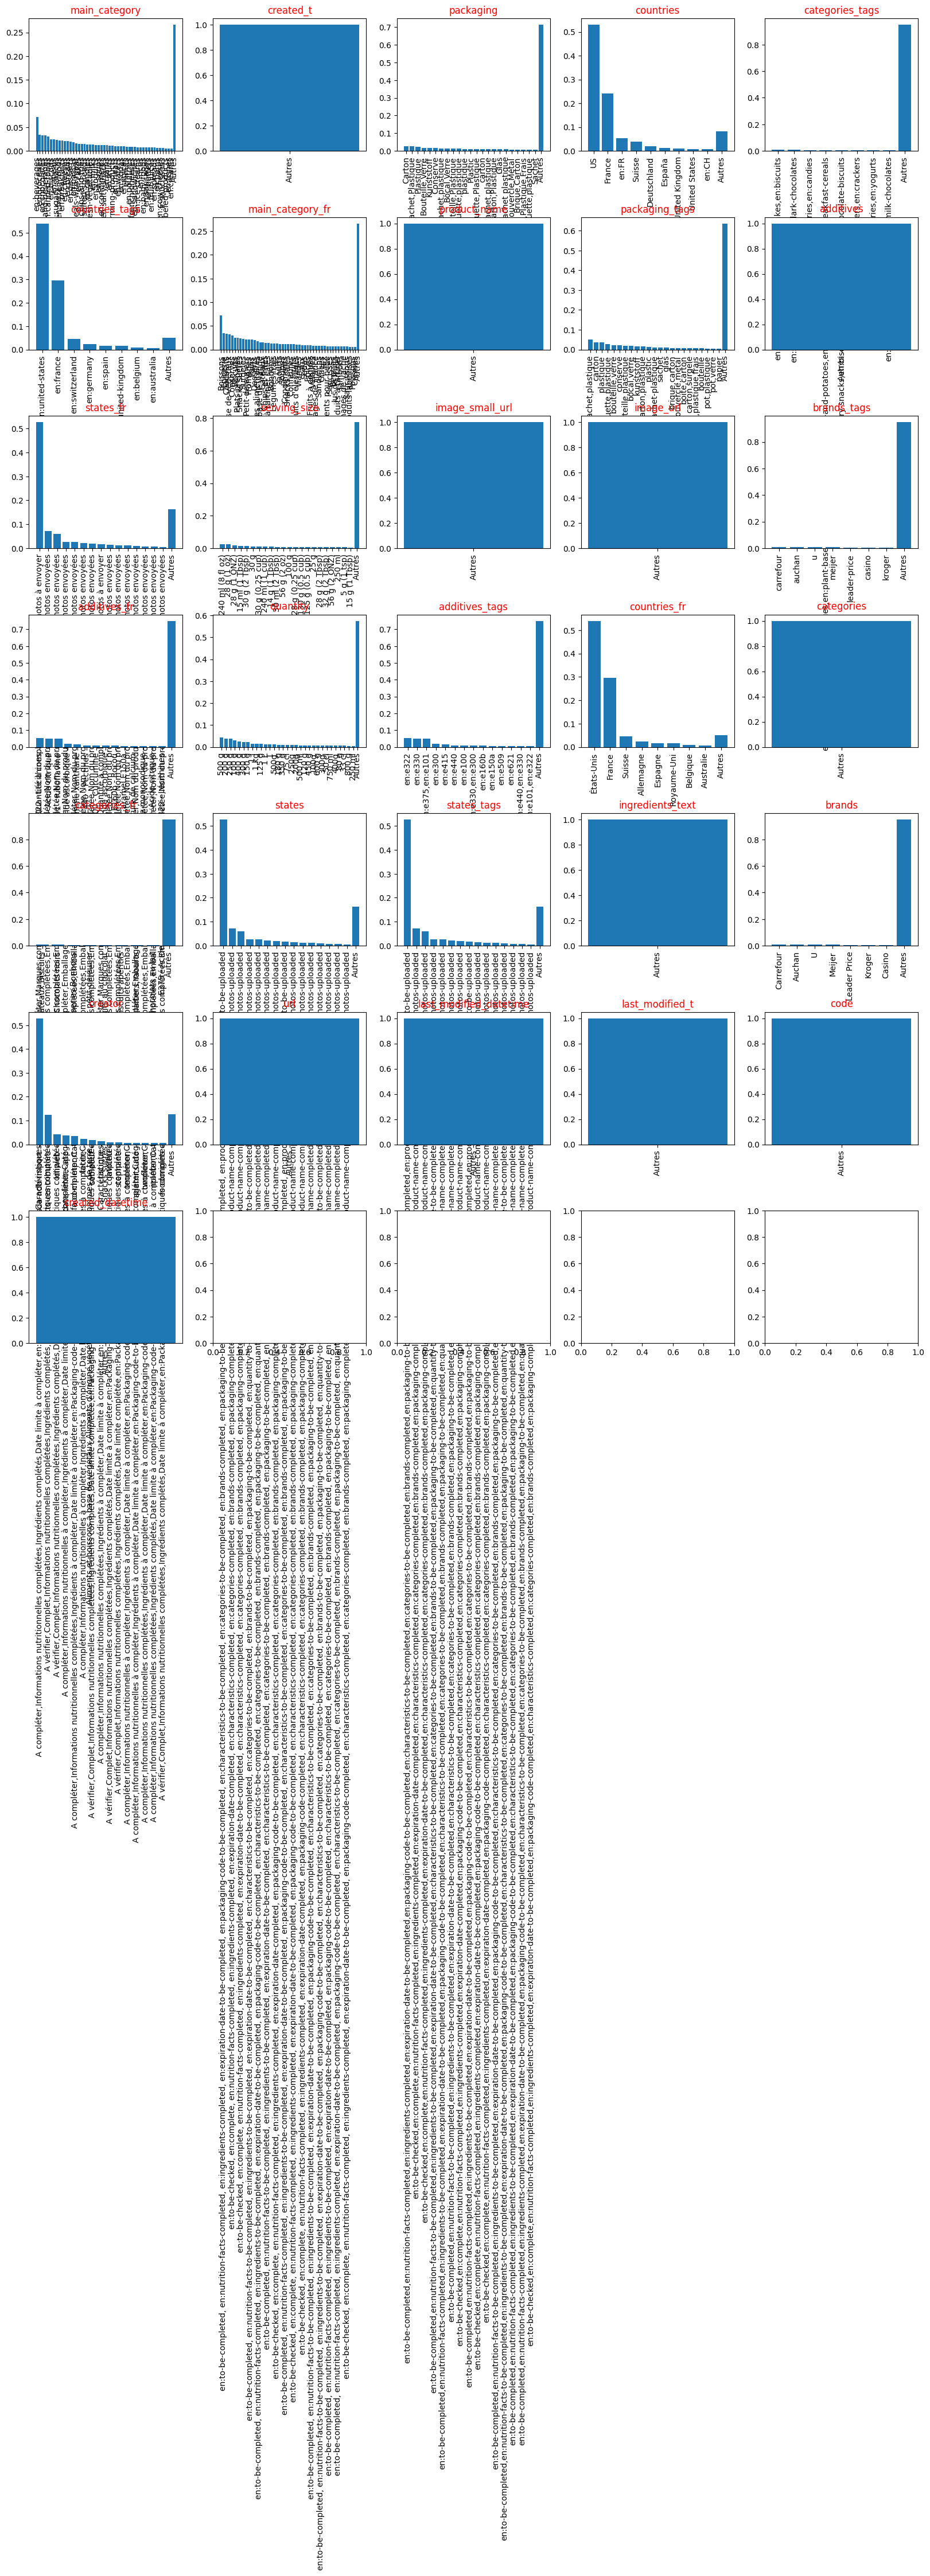

In [33]:
plt.rcParams["figure.figsize"] = (100,40)

fig, axes = plt.subplots(nrows=7, ncols=5,figsize=(20,30))



# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()


# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=.5)
# initialisation du compteur
i=0

# for x in ['categories','packaging_tags','states']: # debug
# boucle de dessins des variables qualitatives
for x in dfQual:
    # passe les labels sur l'axe des x en arriere plan
    axes[i].xaxis.label.set_visible(False)
    
    dfCurrent=summarizeFrequenciesDf(dfQual[x],0.005)
    #print(f"[{i}]-{x}-{(len(x)/10)}") # debug

    axes[i].bar(dfCurrent[x].index,dfCurrent[x])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(x,color='red')

    i=i+1

#fig.suptitle("Données Qualitatives - Mode", fontsize=14)
plt.show()

On constate que ces variables qualitatives dont qu'un taux de fréquences de valeurs < 5%, ce qui signifierait que ces variables ont un nombre trop important de valeurs différentes pour en dégager des catégories de valeurs.
De plus, ces variables n'apportent pas d'information sur la composition des aliments. 
On exclut donc les variables suivantes: last_modified_t, code, image_url, image_small_url, last_modified_date_time, ingredient_text, url, created_t, created_datetime

In [55]:
dfQualLight=dfQual.drop(['packaging','packaging_tags','last_modified_t', 'code', 'image_url', 'image_small_url', 'last_modified_datetime', 'ingredients_text', 'url', 'created_t', 'created_datetime'],axis=1)

# liste des variables qualitatives que l'on garde
colonnesQual=list(dfQualLight.columns.values)

In [56]:
dfNA80[colonnesQual+colonnesNum]

,main_category,countries,categories_tags,countries_tags,main_category_fr,product_name,additives,states_fr,serving_size,brands_tags,...,carbohydrates_100g,fat_100g,sugars_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,sodium_100g,salt_100g,proteins_100g,energy_100g
0,NaN,en:FR,NaN,en:france,NaN,Farine de blé noir,NaN,"A compléter,Informations nutritionnelles à com...",NaN,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,US,NaN,en:united-states,NaN,Banana Chips Sweetened (Whole),[ bananas -> en:bananas ] [ vegetable-oil -...,"A compléter,Informations nutritionnelles compl...",28 g (1 ONZ),NaN,...,64.29,28.57,14.29,0.0,0.0,0.0,0.000,0.00000,3.57,2243.0
2,NaN,US,NaN,en:united-states,NaN,Peanuts,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,"A compléter,Informations nutritionnelles compl...",28 g (0.25 cup),torn-glasser,...,60.71,17.86,17.86,0.0,0.0,0.0,0.250,0.63500,17.86,1941.0
3,NaN,US,NaN,en:united-states,NaN,Organic Salted Nut Mix,[ organic-hazelnuts -> en:organic-hazelnuts ...,"A compléter,Informations nutritionnelles compl...",28 g (0.25 cup),grizzlies,...,17.86,57.14,3.57,0.0,0.0,0.0,0.482,1.22428,17.86,2540.0
4,NaN,US,NaN,en:united-states,NaN,Organic Polenta,[ organic-polenta -> en:organic-polenta ] [...,"A compléter,Informations nutritionnelles compl...",35 g (0.25 cup),bob-s-red-mill,...,77.14,1.43,NaN,0.0,0.0,0.0,NaN,NaN,8.57,1552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,en:RO,NaN,en:romania,NaN,Tomato & ricotta,NaN,"A compléter,Informations nutritionnelles à com...",NaN,panzani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,US,NaN,en:united-states,NaN,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",[ organic-peppermint -> en:organic-peppermint...,"A compléter,Informations nutritionnelles compl...",20 g (0.7 oz),trader-joe-s,...,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.00000,0.00,0.0
320769,en:chips-and-fries,China,"en:salty-snacks,en:appetizers,en:chips-and-fri...",en:china,Chips et frites,乐吧泡菜味薯片,NaN,"A compléter,Informations nutritionnelles à com...",NaN,乐吧,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,en:FR,NaN,en:france,NaN,Tomates aux Vermicelles,NaN,"A compléter,Informations nutritionnelles à com...",NaN,knorr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color=#FB5607>Ecriture fichier CSV</font>

In [52]:
# sortie fichier csv 'products_clean.csv'
dfNA80[colonnesQual+colonnesNum].to_csv('products_clean.csv',index=False)
print(f"Elapsed: {time.time() - now}")

Elapsed: 2085.954103946686


## <font color=#FF006E>Reste a faire</font>

* basculer le tri des données dans le notebook nettoyage => FAIT
* ajouter des titres aux graphiques + commentaires sur les fonctions (notion autres) => FAIT
* comment traiter les valeurs manquantes (moyenne, mediane, remplacement par 0, remplacement par knn, regression linéaire (voir liens entre les valeurs pair plot pour identifier rl) par rapport à la valeur de l'autre variable)
* analyse univariées => en cours
* analyse multivariées (liens entre variables: rl, acp, creation de nouvelles variables)